# 신경망
### 퍼셉트로의 가중치를 자동으로 학습함
### 편향은 균형을 깨는 정도 -> 뉴런이 얼마나 쉽세 활성화되는지를 의미함

# 활성화함수(activation)
### 퍼셉트론은 y= b + w1*x1 + w2*8x2 가 0보다 높은지 낮은지에따라 출력을 나눔 = 계단함수를 activation으로 사용
### 이때 y = h(a[b + w1*x1 + w2*8x2])과 같은 형식으로 뉴드(뉴런)내 에서 입력신호에 대한 출력을 반환함

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
## 넘파이의 트릭을 이용한 계단함수 구현

def step_function(x):
    y = x>0
    return y.astype(np.int)

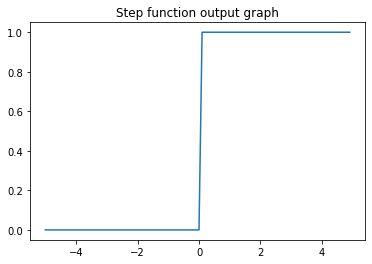

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.title("Step function output graph")
plt.show()

### 시그모이드 함수구현

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

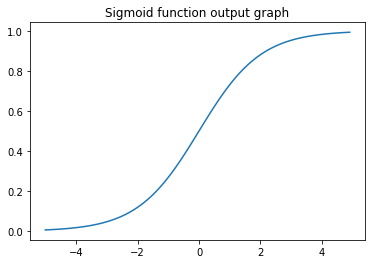

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.title("Sigmoid function output graph")
plt.show()

### 출력이 1 / (1 + (1 + exp^-x)) 이므로 0일때 1/2이며 양측이 -1 or 1로 수렴하는 형태이다
### 추가적으로 활성화함수는 무조건 비선형함수를 사용해야 한다 그렇지 않으면 층을 쌓는 의미가 없다

In [7]:
def relu(x):
    return np.maximum(0, x)

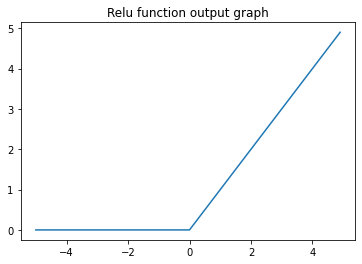

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.title("Relu function output graph")
plt.show()

In [9]:
### 입력과 가중치 출력을 행렬곱으로 표현

X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5],[2, 4, 6]])
print(W)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


In [10]:
### 2개 입력으로 하나의 노드의 한번의 가중치 연산을 행렬곱으로 표현

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


### 굳이 함수로 출력을 정의해준 이유는 출력함수가 항등함수라는걸 보여주기 위하여서이다

In [12]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


# 출력층 설계
### 원하는 출력값 개수에따라 적절히 선택해야함

# 소프트맥스 함수
### 출력값의 총합이 1이된다는 점에서 유용하게 활용가능

In [13]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [14]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [15]:
a = np.array([1010, 1000, 999])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -11]
[9.99937902e-01 4.53971105e-05 1.67006637e-05]


C:\Users\hjhhi\AppData\Local\Temp/ipykernel_5440/2180371532.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\hjhhi\AppData\Local\Temp/ipykernel_5440/2180371532.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a -c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [17]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

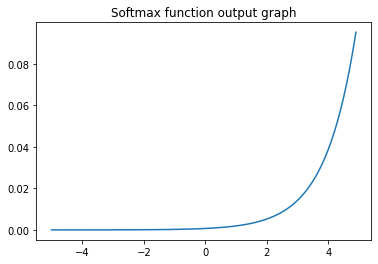

In [28]:
x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.title("Softmax function output graph")
plt.show()

### 소프트 맥스는 단조증가 함수이므로 값의 차이가 달라질뿐 대소관계가 달라지지 않음

# Mnist 순전파 예제

In [18]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


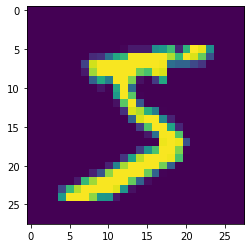

In [20]:
img = X_train[0].reshape(28, 28)
plt.imshow(img)

In [21]:
import pickle

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

### 순전파 예시를 위해 저장된 가중치를 가져옴
def init_network():
    with open("sample_weight.pkl", "rb")as f:
        network = pickle.load(f)
        return network
    
def predict(network, x):
    W1, W2, W3 = network["W1"],network["W2"],network["W3"]
    b1, b2, b3 = network["b1"],network["b2"],network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [22]:
X,t = get_data()
network = init_network()

In [23]:
accuracy_cnt = 0
for i in range(len(X)):
    y = predict(network, X[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:93.52


#  

In [24]:
X, _ = get_data()
netowrk = init_network()
W1, W2, W3 = network["W1"],network["W2"],network["W3"]

In [25]:
X.shape

(10000, 784)

In [26]:
### 784개의 입력 데이터가 은닉층을 통해 10개의 출력층으로 처리됨
print(W1.shape, W2.shape, W3.shape)

(784, 50) (50, 100) (100, 10)


# 배치 처리 구현 
### 단순하게 100개씩 배치를 만들어 데이터 입력해주고 리스트 배치 단위로 가중치 리스트 형식으로 계산하고
### 출력값 역시 넘파이를 이용해 리스트의 True개수를 더하는 동작이기에 위의 순전파동작과 결과가 동일함

In [27]:
def predict(network, x):
    W1, W2, W3 = network["W1"],network["W2"],network["W3"]
    b1, b2, b3 = network["b1"],network["b2"],network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

X, _ = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(X), batch_size):
    x_batch = X[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i + batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(X)))

Accuracy: 0.9352
